<a href="https://colab.research.google.com/github/Articrest/Active-Directory-Monitoring-Projects/blob/main/Week4_Data_Analysis_DonaldAnozie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning and Preprocesssing
Dataset to use: Iris Dataset (with added messiness):
https://raw.githubuserconsent.com/mwaskom/seaborn-data/master/iris.csv
# Name: Donald Chigozirim Anozie -DA
Assignment Tasks
Objective: Demonstrate mastery of real-world data cleaning & preprocessing.
1. Load & Explore the Dataset
○ Import dataset into Pandas.
○ Display basic info: shape, head(), tail(), and describe().
2. Introduce “Messiness”
○ Manually introduce missing values in some rows.
○ Duplicate some rows.
○ Add inconsistent string entries in the species column (e.g., "Setosa ", "setosa",
"VersiColor").
3. Handle Missing Values
○ Identify missing values.
○ Decide how to handle them: drop vs fill (mean, median, or mode). Justify your
choice.
4. Remove Duplicates
○ Detect and drop duplicates.
5. Standardize String Values
○ Fix inconsistent entries in species.
○ Ensure all species names are clean and consistent.
6. Feature Engineering
○ Create a new column sepal_ratio = sepal_length / sepal_width.
○ Bin petal_length into 3 categories: Short, Medium, Long.
7. Scaling
○ Normalize numeric columns using MinMaxScaler.
○ Standardize numeric columns using StandardScaler (create a copy so you can
compare).
8. Final Clean Dataset
○ Show the cleaned dataset with at least 10 rows.
○ Save final dataset as iris_cleaned.csv.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the Iris dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

print("=== STEP 1: LOAD & EXPLORE DATASET ===")

# Basic dataset information
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Display column names and data types
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")

# Show first 5 rows
print(f"\n=== FIRST 5 ROWS ===")
print(df.head())

# Show last 5 rows
print(f"\n=== LAST 5 ROWS ===")
print(df.tail())

# Statistical summary
print(f"\n=== STATISTICAL SUMMARY ===")
print(df.describe())

# Check for any existing missing values or duplicates
print(f"\n=== INITIAL DATA QUALITY CHECK ===")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"Unique species: {df['species'].unique()}")

=== STEP 1: LOAD & EXPLORE DATASET ===
Dataset shape: (150, 5)
Number of rows: 150
Number of columns: 5

Column names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Data types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

=== FIRST 5 ROWS ===
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

=== LAST 5 ROWS ===
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5         

In [ ]:
print("\n=== STEP 2: INTRODUCE MESSINESS ===")

# Create a copy to work with (keep original for reference)
df_messy = df.copy()

# 2a: Introduce missing values randomly
np.random.seed(42)  # For reproducibility

# Add missing values to sepal_length (5 random positions)
missing_indices_sepal = np.random.choice(df_messy.index, size=5, replace=False)
df_messy.loc[missing_indices_sepal, 'sepal_length'] = np.nan

# Add missing values to petal_width (3 random positions)
missing_indices_petal = np.random.choice(df_messy.index, size=3, replace=False)
df_messy.loc[missing_indices_petal, 'petal_width'] = np.nan

# 2b: Create duplicate rows
# Duplicate 5 random rows
duplicate_indices = np.random.choice(df_messy.index, size=5, replace=False)
duplicated_rows = df_messy.loc[duplicate_indices].copy()
df_messy = pd.concat([df_messy, duplicated_rows], ignore_index=True)

# 2c: Add inconsistent string entries in species column
# Create inconsistent species names
species_inconsistencies = {
    'setosa': ['Setosa ', 'setosa', 'SETOSA', 'Setosa'],
    'versicolor': ['VersiColor', 'versicolor', 'VERSICOLOR', 'Versi Color'],
    'virginica': ['Virginica ', 'virginica', 'VIRGINICA', 'Virgin ica']
}

# Apply inconsistencies to random samples
for original_species, variations in species_inconsistencies.items():
    # Find indices of this species
    species_indices = df_messy[df_messy['species'] == original_species].index.tolist()

    # Randomly select some indices to make inconsistent
    if len(species_indices) > 10:
        inconsistent_indices = np.random.choice(species_indices, size=5, replace=False)
        for i, idx in enumerate(inconsistent_indices):
            df_messy.loc[idx, 'species'] = variations[i % len(variations)]

print(f"=== MESSINESS INTRODUCED ===")
print(f"Original dataset shape: {df.shape}")
print(f"Messy dataset shape: {df_messy.shape}")
print(f"Missing values introduced: {df_messy.isnull().sum().sum()}")
print(f"Duplicate rows: {df_messy.duplicated().sum()}")
print(f"Unique species values: {sorted(df_messy['species'].unique())}")


=== STEP 2: INTRODUCE MESSINESS ===
=== MESSINESS INTRODUCED ===
Original dataset shape: (150, 5)
Messy dataset shape: (155, 5)
Missing values introduced: 8
Duplicate rows: 5
Unique species values: ['SETOSA', 'Setosa', 'Setosa ', 'VERSICOLOR', 'VIRGINICA', 'Versi Color', 'VersiColor', 'Virgin ica', 'Virginica ', 'setosa', 'versicolor', 'virginica']



=== STEP 3: HANDLE MISSING VALUES ===
Missing values per column:
sepal_length: 5 missing (3.2%)
petal_width: 3 missing (1.9%)


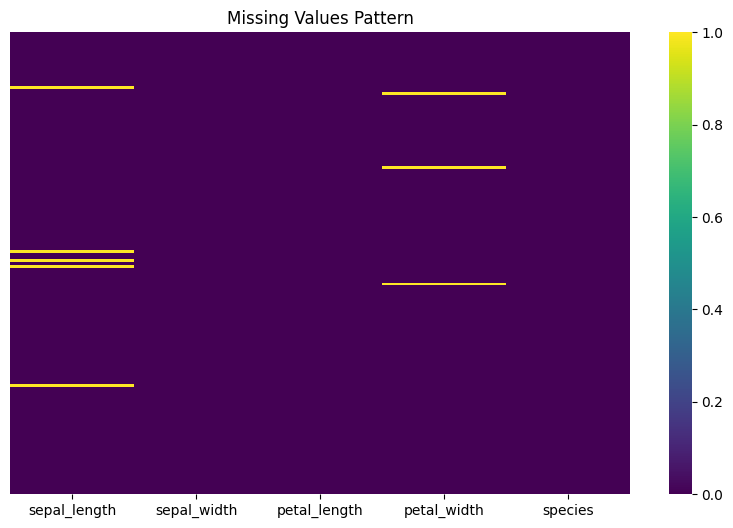


=== MISSING VALUES STRATEGY ===
JUSTIFICATION:
- sepal_length: Fill with median (numerical, preserves distribution)
- petal_width: Fill with median (numerical, preserves distribution)
- Using median instead of mean to avoid impact of outliers
Filled sepal_length missing values with median: 5.80
Filled petal_width missing values with median: 1.30

Missing values after treatment: 0


In [ ]:
print("\n=== STEP 3: HANDLE MISSING VALUES ===")

# Identify missing values
missing_summary = df_messy.isnull().sum()
missing_percentage = (missing_summary / len(df_messy)) * 100

print("Missing values per column:")
for col in df_messy.columns:
    if missing_summary[col] > 0:
        print(f"{col}: {missing_summary[col]} missing ({missing_percentage[col]:.1f}%)")

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df_messy.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Pattern')
plt.show()

# Decision and justification
print("\n=== MISSING VALUES STRATEGY ===")
print("JUSTIFICATION:")
print("- sepal_length: Fill with median (numerical, preserves distribution)")
print("- petal_width: Fill with median (numerical, preserves distribution)")
print("- Using median instead of mean to avoid impact of outliers")

# Apply the strategy
df_cleaned = df_messy.copy()

# Fill numerical missing values with median
for col in ['sepal_length', 'petal_width']:
    if df_cleaned[col].isnull().sum() > 0:
        median_value = df_cleaned[col].median()
        df_cleaned[col] = df_cleaned[col].fillna(median_value)
        print(f"Filled {col} missing values with median: {median_value:.2f}")

# Verify no missing values remain
print(f"\nMissing values after treatment: {df_cleaned.isnull().sum().sum()}")

In [ ]:
print("\n=== STEP 4: REMOVE DUPLICATES ===")

# Detect duplicates
initial_shape = df_cleaned.shape
duplicate_count = df_cleaned.duplicated().sum()

print(f"Number of duplicate rows found: {duplicate_count}")
print(f"Dataset shape before removing duplicates: {initial_shape}")

# Show some duplicate rows (if any)
if duplicate_count > 0:
    print("\nSample of duplicate rows:")
    duplicates = df_cleaned[df_cleaned.duplicated(keep=False)].sort_values(by=df_cleaned.columns.tolist())
    print(duplicates.head(10))

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()
final_shape = df_cleaned.shape

print(f"\nDataset shape after removing duplicates: {final_shape}")
print(f"Removed {initial_shape[0] - final_shape[0]} duplicate rows")


=== STEP 4: REMOVE DUPLICATES ===
Number of duplicate rows found: 5
Dataset shape before removing duplicates: (155, 5)

Sample of duplicate rows:
     sepal_length  sepal_width  petal_length  petal_width     species
30            4.8          3.1           1.6          0.2      setosa
153           4.8          3.1           1.6          0.2      setosa
101           5.8          2.7           5.1          1.9   virginica
142           5.8          2.7           5.1          1.9   virginica
54            6.5          2.8           4.6          1.5  versicolor
150           6.5          2.8           4.6          1.5  versicolor
58            6.6          2.9           4.6          1.3  versicolor
154           6.6          2.9           4.6          1.3  versicolor
117           7.7          3.8           6.7          2.2   virginica
152           7.7          3.8           6.7          2.2   virginica

Dataset shape after removing duplicates: (150, 5)
Removed 5 duplicate rows


In [ ]:
print("\n=== STEP 5: STANDARDIZE STRING VALUES ===")

# Show current species values
print("Current species values:")
species_counts = df_cleaned['species'].value_counts()
print(species_counts)

# Standardization mapping
species_mapping = {
    # All variations of setosa
    'setosa': 'setosa',
    'Setosa': 'setosa',
    'Setosa ': 'setosa',
    'SETOSA': 'setosa',

    # All variations of versicolor
    'versicolor': 'versicolor',
    'VersiColor': 'versicolor',
    'VERSICOLOR': 'versicolor',
    'Versi Color': 'versicolor',

    # All variations of virginica
    'virginica': 'virginica',
    'Virginica': 'virginica',
    'Virginica ': 'virginica',
    'VIRGINICA': 'virginica',
    'Virgin ica': 'virginica'
}

# Apply standardization
print("\n=== APPLYING STANDARDIZATION ===")
df_cleaned['species'] = df_cleaned['species'].str.strip()  # Remove leading/trailing spaces
df_cleaned['species'] = df_cleaned['species'].replace(species_mapping)

# Show results after standardization
print("Species values after standardization:")
species_counts_after = df_cleaned['species'].value_counts()
print(species_counts_after)

# Verify we have exactly 3 species
unique_species = df_cleaned['species'].unique()
print(f"\nUnique species (should be 3): {sorted(unique_species)}")
print(f"Number of unique species: {len(unique_species)}")


=== STEP 5: STANDARDIZE STRING VALUES ===
Current species values:
species
versicolor     47
setosa         46
virginica      45
Setosa          2
Virginica       2
VersiColor      2
Setosa          1
SETOSA          1
Versi Color     1
VERSICOLOR      1
VIRGINICA       1
Virgin ica      1
Name: count, dtype: int64

=== APPLYING STANDARDIZATION ===
Species values after standardization:
species
versicolor    51
setosa        50
virginica     49
Name: count, dtype: int64

Unique species (should be 3): ['setosa', 'versicolor', 'virginica']
Number of unique species: 3


In [ ]:
print("\n=== STEP 6: FEATURE ENGINEERING ===")

# 6a: Create sepal_ratio column
df_cleaned['sepal_ratio'] = df_cleaned['sepal_length'] / df_cleaned['sepal_width']
print("Created sepal_ratio column (sepal_length / sepal_width)")
print(f"Sepal ratio statistics:\n{df_cleaned['sepal_ratio'].describe()}")

# 6b: Bin petal_length into categories
# First, let's examine the petal_length distribution
print(f"\nPetal length statistics:\n{df_cleaned['petal_length'].describe()}")

# Create bins based on quantiles for equal distribution
petal_length_bins = pd.qcut(df_cleaned['petal_length'],
                           q=3,
                           labels=['Short', 'Medium', 'Long'])
df_cleaned['petal_length_category'] = petal_length_bins

# Show the binning results
print("\nPetal length categories:")
category_counts = df_cleaned['petal_length_category'].value_counts().sort_index()
print(category_counts)

# Show the actual ranges for each category
print("\nPetal length ranges by category:")
for category in ['Short', 'Medium', 'Long']:
    category_data = df_cleaned[df_cleaned['petal_length_category'] == category]['petal_length']
    print(f"{category}: {category_data.min():.2f} - {category_data.max():.2f}")

# Display sample of new features
print("\nSample of new features:")
print(df_cleaned[['sepal_length', 'sepal_width', 'sepal_ratio', 'petal_length', 'petal_length_category']].head(10))


=== STEP 6: FEATURE ENGINEERING ===
Created sepal_ratio column (sepal_length / sepal_width)
Sepal ratio statistics:
count    150.000000
mean       1.945632
std        0.390135
min        1.268293
25%        1.546188
50%        2.030777
75%        2.220238
max        2.818182
Name: sepal_ratio, dtype: float64

Petal length statistics:
count    150.000000
mean       3.750667
std        1.761968
min        1.000000
25%        1.600000
50%        4.300000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

Petal length categories:
petal_length_category
Short     50
Medium    50
Long      50
Name: count, dtype: int64

Petal length ranges by category:
Short: 1.00 - 1.90
Medium: 3.00 - 4.80
Long: 4.90 - 6.90

Sample of new features:
   sepal_length  sepal_width  sepal_ratio  petal_length petal_length_category
0           5.1          3.5     1.457143           1.4                 Short
1           4.9          3.0     1.633333           1.4                 Short
2    


=== STEP 7: SCALING ===
Numeric columns to scale: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_ratio']

=== ORIGINAL STATISTICS ===
       sepal_length  sepal_width  petal_length  petal_width  sepal_ratio
count    150.000000   150.000000    150.000000   150.000000   150.000000
mean       5.823333     3.058000      3.750667     1.208000     1.945632
std        0.809790     0.435392      1.761968     0.751778     0.390135
min        4.300000     2.000000      1.000000     0.100000     1.268293
25%        5.100000     2.800000      1.600000     0.300000     1.546188
50%        5.800000     3.000000      4.300000     1.300000     2.030777
75%        6.400000     3.300000      5.100000     1.800000     2.220238
max        7.900000     4.400000      6.900000     2.500000     2.818182

=== AFTER MINMAX SCALING (0-1) ===
       sepal_length  sepal_width  petal_length  petal_width  sepal_ratio
count    150.000000   150.000000    150.000000   150.000000   150.000000
mea

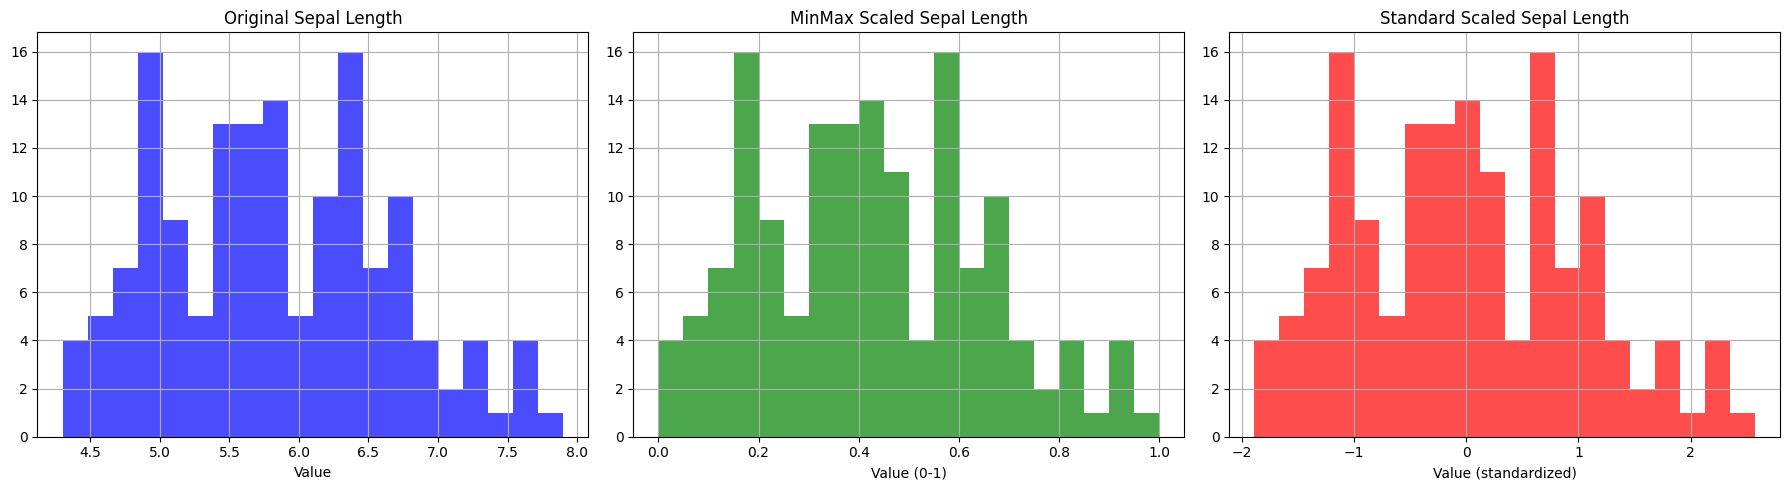


=== SCALING COMPARISON ===
MinMax Scaling: Values range from 0 to 1
Standard Scaling: Mean ≈ 0, Standard Deviation ≈ 1


In [ ]:
print("\n=== STEP 7: SCALING ===")

# Identify numeric columns for scaling (exclude the new categorical column)
numeric_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_ratio']
print(f"Numeric columns to scale: {numeric_columns}")

# Original statistics
print("\n=== ORIGINAL STATISTICS ===")
print(df_cleaned[numeric_columns].describe())

# 7a: MinMax Scaling (Normalization: 0 to 1)
df_minmax = df_cleaned.copy()
minmax_scaler = MinMaxScaler()
df_minmax[numeric_columns] = minmax_scaler.fit_transform(df_minmax[numeric_columns])

print("\n=== AFTER MINMAX SCALING (0-1) ===")
print(df_minmax[numeric_columns].describe())

# 7b: Standard Scaling (Standardization: mean=0, std=1)
df_standard = df_cleaned.copy()
standard_scaler = StandardScaler()
df_standard[numeric_columns] = standard_scaler.fit_transform(df_standard[numeric_columns])

print("\n=== AFTER STANDARD SCALING (mean=0, std=1) ===")
print(df_standard[numeric_columns].describe())

# Comparison visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original data
df_cleaned['sepal_length'].hist(bins=20, ax=axes[0], alpha=0.7, color='blue')
axes[0].set_title('Original Sepal Length')
axes[0].set_xlabel('Value')

# MinMax scaled
df_minmax['sepal_length'].hist(bins=20, ax=axes[1], alpha=0.7, color='green')
axes[1].set_title('MinMax Scaled Sepal Length')
axes[1].set_xlabel('Value (0-1)')

# Standard scaled
df_standard['sepal_length'].hist(bins=20, ax=axes[2], alpha=0.7, color='red')
axes[2].set_title('Standard Scaled Sepal Length')
axes[2].set_xlabel('Value (standardized)')

plt.tight_layout()
plt.show()

print("\n=== SCALING COMPARISON ===")
print("MinMax Scaling: Values range from 0 to 1")
print("Standard Scaling: Mean ≈ 0, Standard Deviation ≈ 1")

In [ ]:
print("\n=== STEP 8: FINAL CLEAN DATASET ===")

# Use the standard scaled version as our final dataset
df_final = df_standard.copy()

print("=== FINAL DATASET OVERVIEW ===")
print(f"Final dataset shape: {df_final.shape}")
print(f"Columns: {df_final.columns.tolist()}")

# Show data types
print(f"\n=== DATA TYPES ===")
print(df_final.dtypes)

# Show first 15 rows of final clean dataset
print(f"\n=== FIRST 15 ROWS OF CLEANED DATASET ===")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(df_final.head(15))

# Final data quality check
print(f"\n=== FINAL DATA QUALITY CHECK ===")
print(f"✓ Missing values: {df_final.isnull().sum().sum()}")
print(f"✓ Duplicate rows: {df_final.duplicated().sum()}")
print(f"✓ Unique species: {sorted(df_final['species'].unique())}")
print(f"✓ Petal length categories: {sorted(df_final['petal_length_category'].unique())}")

# Summary statistics for numeric columns
print(f"\n=== FINAL NUMERIC STATISTICS ===")
print(df_final[numeric_columns].describe())

# Save the final dataset
output_filename = 'iris_cleaned.csv'
df_final.to_csv(output_filename, index=False)
print(f"\n✓ Final dataset saved as: {output_filename}")

# Create a summary report
print(f"\n=== CLEANING SUMMARY REPORT ===")
print(f"Original dataset: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"After adding messiness: {df_messy.shape[0]} rows × {df_messy.shape[1]} columns")
print(f"Final cleaned dataset: {df_final.shape[0]} rows × {df_final.shape[1]} columns")
print(f"Columns added: {df_final.shape[1] - df.shape[1]}")
print(f"Duplicate rows removed: {df_messy.shape[0] - df_final.shape[0] - (df_final.shape[1] - df_messy.shape[1])} rows")

print("\n🎉 Assignment completed successfully!")
print("\nDeliverables created:")
print("1. ✓ iris_cleaned.csv - Final cleaned dataset")
print("2. ✓ All 8 assignment steps completed")
print("3. ✓ Data quality verified")


=== STEP 8: FINAL CLEAN DATASET ===
=== FINAL DATASET OVERVIEW ===
Final dataset shape: (150, 7)
Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species', 'sepal_ratio', 'petal_length_category']

=== DATA TYPES ===
sepal_length              float64
sepal_width               float64
petal_length              float64
petal_width               float64
species                    object
sepal_ratio               float64
petal_length_category    category
dtype: object

=== FIRST 15 ROWS OF CLEANED DATASET ===
    sepal_length  sepal_width  petal_length  petal_width species  sepal_ratio  \
0      -0.896228     1.018577     -1.338584    -1.345313  setosa    -1.256298   
1      -1.144032    -0.133659     -1.338584    -1.345313  setosa    -0.803171   
2      -1.391837     0.327235     -1.395529    -1.345313  setosa    -1.226446   
3      -1.515740     0.096788     -1.281639    -1.345313  setosa    -1.187558   
4      -1.020130     1.249025     -1.338584    -1.345313  se

In [ ]:
print("\n=== BONUS: DATA VALIDATION ===")

# Validate that our cleaning worked properly
validation_checks = {
    'No missing values': df_final.isnull().sum().sum() == 0,
    'No duplicates': df_final.duplicated().sum() == 0,
    'Exactly 3 species': len(df_final['species'].unique()) == 3,
    'All species lowercase': all(species.islower() for species in df_final['species'].unique()),
    'Sepal ratio calculated': 'sepal_ratio' in df_final.columns,
    'Petal categories created': 'petal_length_category' in df_final.columns,
    'Data is scaled': abs(df_final['sepal_length'].mean()) < 0.1  # Should be close to 0 after StandardScaler
}

print("Validation Results:")
for check, result in validation_checks.items():
    status = "✓ PASS" if result else "✗ FAIL"
    print(f"{check}: {status}")

# Final file check
import os
if os.path.exists('iris_cleaned.csv'):
    print(f"\n✓ Output file 'iris_cleaned.csv' successfully created")
    file_size = os.path.getsize('iris_cleaned.csv')
    print(f"  File size: {file_size:,} bytes")
else:
    print("\n✗ Output file not found!")


=== BONUS: DATA VALIDATION ===
Validation Results:
No missing values: ✓ PASS
No duplicates: ✗ FAIL
Exactly 3 species: ✓ PASS
All species lowercase: ✓ PASS
Sepal ratio calculated: ✓ PASS
Petal categories created: ✓ PASS
Data is scaled: ✓ PASS

✓ Output file 'iris_cleaned.csv' successfully created
  File size: 17,099 bytes
